In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

def convertToUndirected(path, delimeter, make_csv=True):
    df = pd.read_csv(path+".txt", delimiter=delimeter, header=None) #loading
    df.rename(columns={0:"u", 1:"v"}, inplace=True) #renaming
    for index, row in df.iterrows(): #making edges undirected
        if (row['u']>row['v']):
            row['u'], row['v'] = row['v'], row['u']
    df.drop_duplicates(inplace=True)
    df.drop(df[df['u']==df['v']].index, inplace=True) #dropping self loops
    df.sort_values(by=['u', 'v'], inplace=True) #sorting
    df.reset_index(inplace=True, drop=True)
    print(f"node numbers: from {df.min().min()} to {df.max().max()}")
    if (make_csv):
        df.to_csv(path+"_undirected.csv", header=False, index=False)
    return df

def makeIndepLabels(n, d, low=0, high=100, path=None):
    np.random.seed(2030)
    random_numbers = np.random.randint(low=low, high=high, size=(n, d))
    df = pd.DataFrame(random_numbers)
    if (path!=None):
        df.to_csv(path+"_labels-indep-"+str(d)+"d.csv", header=False, index=False)
    return df

def makeCorrLabels(n, d, norm_scale=0.5, low=0, high=100, path=None):
    np.random.seed(2030)
    p = np.random.normal(size=n) #(x0,y0,z0), a random point, p, in a plane perpendicular to the line from (0,0,...,0) to (1,1,...,1)
    p_sum = p * d #sum of p = x0+y0+z0=3x0 (x0=y0=z0)
    random_numbers = np.array([(np.random.normal(loc=p[x], scale=norm_scale, size=d-1)) for x in range(0,n)])
    dth_random = [p_sum[x] - [random_numbers[x,:].sum()] for x in range(0,n)] # 1*(x-x0) + 1*(y-y0) + 1*(z-z0) = 0
    random_numbers = np.append(random_numbers, dth_random, axis=1) #all dimensions
    mini = random_numbers.min(axis=0) #minimum number in each dimension
    maxi = random_numbers.max(axis=0) #maximum number in each dimension
    random_numbers = ((random_numbers - mini)/(maxi - mini))*(high-low) #scaling numbers between 0 to 100
    random_numbers = random_numbers.astype(int)
    df = pd.DataFrame(random_numbers)
    if (path!=None):
        df.to_csv(path+"_labels-corr-scale="+str(norm_scale)+"-"+str(d)+"d.csv", header=False, index=False)
    return df

def makeAnticorrLabels(n, d, low=0, high=100, path=None):
    np.random.seed(2030)
    p = np.random.normal(loc=0.5, scale=0.05, size=n)
    p_sum = p * d #sum of p = x0+y0+z0=3x0 (x0=y0=z0)
    random_numbers = np.random.rand(n, d-1) #for d-1 dimensions
    dth_random = [p_sum[x] - [random_numbers[x,:].sum()] for x in range(0,n)] # 1*(x-x0) + 1*(y-y0) + 1*(z-z0) = 0
    random_numbers = np.append(random_numbers, dth_random, axis=1) #all dimensions
    mini = random_numbers.min(axis=0) #minimum number in each dimension
    maxi = random_numbers.max(axis=0) #maximum number in each dimension
    random_numbers = ((random_numbers - mini)/(maxi - mini))*(high-low) #scaling numbers between 0 to 100
    random_numbers = random_numbers.astype(int)
    df = pd.DataFrame(random_numbers)
    if (path!=None):
        df.to_csv(path+"_labels-anticorr-"+str(d)+"d.csv", header=False, index=False)
    return df

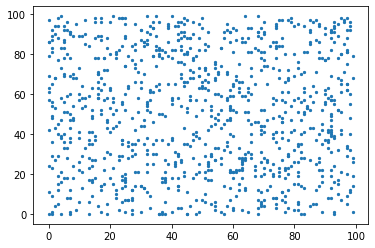

In [4]:
indep = makeIndepLabels(n, d)
plt.scatter(indep[0], indep[1], s=5)
plt.show()

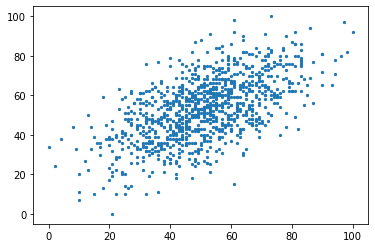

In [5]:
corr = makeCorrLabels(n, d, norm_scale=0.5)
plt.scatter(corr[0], corr[1], s=5)
plt.show()

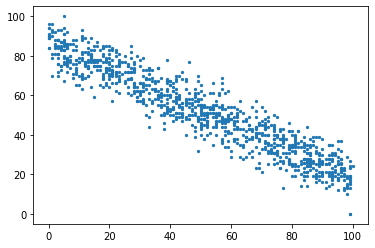

In [6]:
anticorr = makeAnticorrLabels(n, d)
plt.scatter(anticorr[0], anticorr[1], s=5)
plt.show()